# CO2 Emission Data Analysis for Different Cities Around the World


# Introduction
In this analysis, we will be examining CO2 emission data from different cities around the world to identify trends and patterns in the data. The dataset used for this analysis are:
- cities_emissions.xlsx
- cities_population_area.xlsx

In [89]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
df_cities_emissions = pd.read_excel('cities_emissions.xlsx')
df_cities_population_area = pd.read_excel('cities_population_area.xlsx')

In [90]:
# Initial Data Inspection
df_cities_emissions.head(10)

,org_id,crm_org_name,crm_country_name,row_name,direct_emissions_metric_tonnes_co2e
0,3422,Greater London Authority,United Kingdom of Great Britain and Northern I...,Total Emissions (excluding generation of grid-...,20652935.00
1,1850,Birmingham City Council,United Kingdom of Great Britain and Northern I...,Total Emissions (excluding generation of grid-...,3134377.46
2,2185,Bristol City Council,United Kingdom of Great Britain and Northern I...,Total Emissions (excluding generation of grid-...,1160224.67
3,2430,City of Burlington,United States of America,Total Emissions (excluding generation of grid-...,359615.00
4,3203,City of Chicago,United States of America,Total Emissions (excluding generation of grid-...,15893258.00
5,3417,New York City,United States of America,Total Emissions (excluding generation of grid-...,38275608.00
6,3422,Greater London Authority,United Kingdom of Great Britain and Northern I...,Total Emissions (excluding generation of grid-...,20652935.00
7,3429,City of Stockholm,Sweden,Total Emissions (excluding generation of grid-...,814553.00
8,5871,Essex County Council,United Kingdom of Great Britain and Northern I...,Total Emissions (excluding generation of grid-...,5925463.83
9,8242,City of Helsinki,Finland,Total Emissions (excluding generation of grid-...,824063.00


In [91]:
print('The shape of the data frame containging cities population and area has a shape of:', df_cities_population_area.shape)
print(' ')

df_cities_population_area.head(10)

The shape of the data frame containging cities population and area has a shape of: (1552, 5)
 


,org_id,crm_org_name,crm_country_name,value,variable
0,1184,City of Austin,United States of America,964254.00,population
1,1184,City of Austin,United States of America,845.70,land area km2
2,1499,Ajuntament de Barcelona,Spain,1636762.00,population
3,1499,Ajuntament de Barcelona,Spain,102.15,land area km2
4,1850,Birmingham City Council,United Kingdom of Great Britain and Northern I...,1141400.00,population
5,1850,Birmingham City Council,United Kingdom of Great Britain and Northern I...,267.80,land area km2
6,2185,Bristol City Council,United Kingdom of Great Britain and Northern I...,463400.00,population
7,2185,Bristol City Council,United Kingdom of Great Britain and Northern I...,110.00,land area km2
8,2430,City of Burlington,United States of America,42284.00,population
9,2430,City of Burlington,United States of America,27.50,land area km2


# Data wrangling 
lets deal with each data frame individualy 

## Cities emissions data

In [92]:
print('The shape of the data frame containging cities emissions has a shape of:', df_cities_emissions.shape)
print(" ")
df_cities_emissions.nunique() 

The shape of the data frame containging cities emissions has a shape of: (426, 5)
 


org_id                                 425
crm_org_name                           425
crm_country_name                        60
row_name                                 1
direct_emissions_metric_tonnes_co2e    379
dtype: int64

In [93]:
# Select only the rows with duplicated values in the 'org_id' column 
df_cities_emissions[df_cities_emissions.duplicated()]


,org_id,crm_org_name,crm_country_name,row_name,direct_emissions_metric_tonnes_co2e
6,3422,Greater London Authority,United Kingdom of Great Britain and Northern I...,Total Emissions (excluding generation of grid-...,20652935.0


In [94]:
# removing duplicates
df_cities_emissions.drop_duplicates(inplace=True)

# we can aso drop the row_name column as it only says 'Total Emissions (excluding generation of grid-supplied energy)'
df_cities_emissions.drop('row_name', axis=1, inplace=True)


In [95]:
df_cities_emissions.isna().sum() 

org_id                                  0
crm_org_name                            0
crm_country_name                        0
direct_emissions_metric_tonnes_co2e    40
dtype: int64

In [96]:
# determine which rows have at least one NaN value
df_cities_emissions[df_cities_emissions.isna().any(axis=1) 
                & df_cities_emissions.direct_emissions_metric_tonnes_co2e.isna()]



,org_id,crm_org_name,crm_country_name,direct_emissions_metric_tonnes_co2e
309,31110,Roma Capitale,Italy,NaN
310,35857,City of Cincinnati,United States of America,NaN
311,35863,eThekwini Municipality,South Africa,NaN
312,36274,Comune di Bologna,Italy,NaN
313,43909,City of Orlando,United States of America,NaN
314,50375,Ayuntamiento de Chihuahua,Mexico,NaN
315,51079,Guatemala City,Guatemala,NaN
316,54349,Balikpapan City Government,Indonesia,NaN
317,54389,Taichung City Government,"Taiwan, Greater China",NaN
318,54611,Alcaldia de Manizales,Colombia,NaN


In [97]:
for val_name in df_cities_emissions['crm_country_name'].unique():

  df = df_cities_emissions[df_cities_emissions.crm_country_name == val_name]
  
  num_nan = df.direct_emissions_metric_tonnes_co2e.isna().sum()
  if num_nan > 0:
    num_total = df.shape[0]
    percentage = (num_nan / num_total) * 100
    print(f"The percentage of NaN values in contry'{val_name}' is: {percentage}%")

The percentage of NaN values in contry'United States of America' is: 7.07070707070707%
The percentage of NaN values in contry'Australia' is: 7.142857142857142%
The percentage of NaN values in contry'South Africa' is: 16.666666666666664%
The percentage of NaN values in contry'Colombia' is: 7.6923076923076925%
The percentage of NaN values in contry'Argentina' is: 17.647058823529413%
The percentage of NaN values in contry'Mexico' is: 33.33333333333333%
The percentage of NaN values in contry'Brazil' is: 11.11111111111111%
The percentage of NaN values in contry'Taiwan, Greater China' is: 20.0%
The percentage of NaN values in contry'Italy' is: 22.22222222222222%
The percentage of NaN values in contry'Indonesia' is: 33.33333333333333%
The percentage of NaN values in contry'Chile' is: 16.666666666666664%
The percentage of NaN values in contry'Philippines' is: 40.0%
The percentage of NaN values in contry'Peru' is: 50.0%
The percentage of NaN values in contry'Guatemala' is: 25.0%
The percentage 

we can see that some conties are missing up to 25 percent of the emmition data, thus dropping the row or replacing the values with a mean co2 emmition of the contry may effect the relation between co2 emmition, population and area sifnificantly.

we could replace the co2 emmition values with cities that have similar population and areas frrom differnt conties   

## Cities population and area

Before mergin the tables we have the tidy the data in the df_cities_population_area data frame. 

For data to be tidy, it must have:
- Each variable as a separate column
- Each row as a separate observation

Thus df colums 'value'and 'variable' need to be reshaped

In [98]:
# given the org_id has zero missing value we can combine the 
df_cities_population_area.isna().sum() 

org_id               0
crm_org_name        10
crm_country_name     0
value               10
variable             0
dtype: int64

In [99]:

df_population = df_cities_population_area[df_cities_population_area.variable == 'population']\
                                        .rename(columns={'value': 'population'})\
                                        .drop('variable', axis=1)

df_area = df_cities_population_area[df_cities_population_area.variable == 'land area km2']\
                                        .rename(columns={'value': 'land_area'})\
                                        .drop('variable', axis=1)
# droping the	'crm_org_name' and 'crm_country_name' so we don'tt get duplicate 
# columns in the merged df 
df_area.drop(['crm_org_name', 'crm_country_name'], axis=1, inplace=True)

# left merge df_population and  df_area
df_population_area_merged = pd.merge(df_population, df_area, on='org_id', how='left')

df_population_area_merged.head(5)


,org_id,crm_org_name,crm_country_name,population,land_area
0,1184,City of Austin,United States of America,964254.0,845.70
1,1499,Ajuntament de Barcelona,Spain,1636762.0,102.15
2,1850,Birmingham City Council,United Kingdom of Great Britain and Northern I...,1141400.0,267.80
3,2185,Bristol City Council,United Kingdom of Great Britain and Northern I...,463400.0,110.00
4,2430,City of Burlington,United States of America,42284.0,27.50


In [100]:
print('The shape of the df_population_area_merged has a shape of')
print(df_population_area_merged.shape)

df_population_area_merged.isna().sum() 

The shape of the df_population_area_merged has a shape of
(776, 5)


org_id              0
crm_org_name        1
crm_country_name    0
population          1
land_area           9
dtype: int64

In [101]:
"""
given that we want to know the relationship between:
- co2 emmition and population
- co2 emmition and area
we have to left merge df_cities_emissions to df_population_area_merged
"""


# droping the	'crm_org_name' and 'crm_country_name' so we don'tt get duplicate 
# columns in the merged df 
df_population_area_merged.drop(['crm_org_name', 'crm_country_name'], axis=1, inplace=True)

# left merge df_cities_emissions and  df_population_area_merged
df_emissions_population_area_merged = pd.merge(df_cities_emissions, df_population_area_merged, on='org_id', how='left')

df_emissions_population_area_merged.head(5)


,org_id,crm_org_name,crm_country_name,direct_emissions_metric_tonnes_co2e,population,land_area
0,3422,Greater London Authority,United Kingdom of Great Britain and Northern I...,20652935.00,8908081.0,1595.0
1,1850,Birmingham City Council,United Kingdom of Great Britain and Northern I...,3134377.46,1141400.0,267.8
2,2185,Bristol City Council,United Kingdom of Great Britain and Northern I...,1160224.67,463400.0,110.0
3,2430,City of Burlington,United States of America,359615.00,42284.0,27.5
4,3203,City of Chicago,United States of America,15893258.00,2705994.0,606.0


In [102]:

print('The shape of the df_emissions_population_area_merged has a shape of')
print(df_emissions_population_area_merged.shape)

print(df_emissions_population_area_merged.isna().sum() )

df_emissions_population_area_merged[df_emissions_population_area_merged\
                                    .land_area.isna()]


The shape of the df_emissions_population_area_merged has a shape of
(425, 6)
org_id                                  0
crm_org_name                            0
crm_country_name                        0
direct_emissions_metric_tonnes_co2e    40
population                              0
land_area                               1
dtype: int64


,org_id,crm_org_name,crm_country_name,direct_emissions_metric_tonnes_co2e,population,land_area
397,59550,"City of Bend, OR",United States of America,NaN,100000.0,NaN


In [103]:
"""

"""
mask_1 = df_emissions_population_area_merged.crm_country_name == 'United States of America' 
mask_2 = df_emissions_population_area_merged.population > 100000.0*0.9
mask_3 = df_emissions_population_area_merged.population < 100000.0*1.1
df = df_emissions_population_area_merged[mask_1 & mask_2 & mask_3]

mean_area_us = df.land_area.mean()
print('mean_area_us:',mean_area_us)
df_emissions_population_area_merged.land_area.fillna(mean_area_us, inplace=True)

print(df_emissions_population_area_merged.isna().sum() )


######

print('percentage of missing emissions data with respect to each contry' )
for val_name in df_emissions_population_area_merged['crm_country_name'].unique():

  df = df_emissions_population_area_merged[df_emissions_population_area_merged.crm_country_name == val_name]
  
  num_nan = df.direct_emissions_metric_tonnes_co2e.isna().sum()
  
  if num_nan > 0:
    num_total = df.shape[0]
    percentage = (num_nan / num_total) * 100
    print(f"The percentage of NaN values in contry' {val_name} ' is: {percentage}%")



mean_area_us: 62.887534
org_id                                  0
crm_org_name                            0
crm_country_name                        0
direct_emissions_metric_tonnes_co2e    40
population                              0
land_area                               0
dtype: int64
percentage of missing emissions data with respect to each contry
The percentage of NaN values in contry' United States of America ' is: 7.07070707070707%
The percentage of NaN values in contry' Australia ' is: 7.142857142857142%
The percentage of NaN values in contry' South Africa ' is: 16.666666666666664%
The percentage of NaN values in contry' Colombia ' is: 7.6923076923076925%
The percentage of NaN values in contry' Argentina ' is: 17.647058823529413%
The percentage of NaN values in contry' Mexico ' is: 33.33333333333333%
The percentage of NaN values in contry' Brazil ' is: 11.11111111111111%
The percentage of NaN values in contry' Taiwan, Greater China ' is: 20.0%
The percentage of NaN values in co

In [104]:
"""
we are going to droping Belgium and Lao People's Democratic Republic rows has
 missing 100% of the emmision data 
"""
mask_1 = df_emissions_population_area_merged.crm_country_name != "Belgium"
mask_2 = df_emissions_population_area_merged.crm_country_name != "Lao People's Democratic Republic"
df_emissions_population_area_merged = df_emissions_population_area_merged[mask_1 & mask_2]

df_emissions_population_area_merged


,org_id,crm_org_name,crm_country_name,direct_emissions_metric_tonnes_co2e,population,land_area
0,3422,Greater London Authority,United Kingdom of Great Britain and Northern I...,20652935.00,8908081.0,1595.0
1,1850,Birmingham City Council,United Kingdom of Great Britain and Northern I...,3134377.46,1141400.0,267.8
2,2185,Bristol City Council,United Kingdom of Great Britain and Northern I...,1160224.67,463400.0,110.0
3,2430,City of Burlington,United States of America,359615.00,42284.0,27.5
4,3203,City of Chicago,United States of America,15893258.00,2705994.0,606.0
...,...,...,...,...,...,...
420,848259,Mongua,Colombia,23660.20,4495.0,371.0
421,848404,Mongui,Colombia,4313.75,4243.0,81.0
422,848977,Busbanza,Colombia,14977090.00,1156.0,2549.0
423,848978,Floresta,Colombia,14977.09,3231.0,88.3


In [105]:
"""
Each contry has thier ouw laws and regulation for co2 emissions.
Thus we can relace the direct_emissions_metric_tonnes_co2e missing values with 
mean of cities that are in the same contry, and have the similar population	and land_area.
"""


df_missing_emissions_data  = df_emissions_population_area_merged[df_emissions_population_area_merged\
                                    .direct_emissions_metric_tonnes_co2e.isna()]
df_dropna_missing_emissions_data = df_emissions_population_area_merged.dropna()

for index, row in df_missing_emissions_data.iterrows():
    ##
    contry_of_interest = row['crm_country_name']
    # print('contry_of_interest: ',contry_of_interest)
    mask_1 = df_emissions_population_area_merged.crm_country_name == contry_of_interest
    df_mask_1 = df_dropna_missing_emissions_data[mask_1]
    
    ##
    # population_of_interest = row['population']
    # print('population_of_interest: ',population_of_interest)
    # mask_2 = df_emissions_population_area_merged.population > population_of_interest*0.9
    # mask_3 = df_emissions_population_area_merged.population < population_of_interest*1.1
    # df_mask_2_3 = df_mask_1[mask_2 & mask_3]
    
    # ##
    # land_area_of_interest = row['land_area']
    # print('land_area_of_interest: ',land_area_of_interest)
    # mask_4 = df_emissions_population_area_merged.land_area > land_area_of_interest*0.9
    # mask_5 = df_emissions_population_area_merged.land_area < land_area_of_interest*1.1
    # df_mask_4_5 = df_mask_2_3[mask_4 & mask_5]

    

    mean_emition_val = df_mask_1.direct_emissions_metric_tonnes_co2e.mean()
    
    df_emissions_population_area_merged.loc[df_emissions_population_area_merged['crm_country_name'] == contry_of_interest, 'population'].fillna(mean_emition_val, inplace=True)
    




# renaming data frame and colums 
df_data = df_emissions_population_area_merged.rename(columns={"org_id" : "id", 
                                    "crm_org_name" : "city_name", 
                                    "crm_country_name" : "country_name", 
                                    "direct_emissions_metric_tonnes_co2e": "co2_emissions_metric_tonnes"                       
                                    })

df_data["co2_emissions_metric_tonnes_per_capita"] = df_data["co2_emissions_metric_tonnes"] / df_data["population"]

df_data["population_density"] = df_data["population"] / df_data["land_area"]

df_data["co2_emissions_metric_tonnes_per_km2"] = df_data["co2_emissions_metric_tonnes"] / df_data["land_area"]

df_data.head(5)


<ipython-input-105-6eda406cc93c>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_mask_1 = df_dropna_missing_emissions_data[mask_1]


,id,city_name,country_name,co2_emissions_metric_tonnes,population,land_area,co2_emissions_metric_tonnes_per_capita,population_density,co2_emissions_metric_tonnes_per_km2
0,3422,Greater London Authority,United Kingdom of Great Britain and Northern I...,20652935.00,8908081.0,1595.0,2.318449,5585.003762,12948.548589
1,1850,Birmingham City Council,United Kingdom of Great Britain and Northern I...,3134377.46,1141400.0,267.8,2.746082,4262.135922,11704.172741
2,2185,Bristol City Council,United Kingdom of Great Britain and Northern I...,1160224.67,463400.0,110.0,2.503722,4212.727273,10547.497000
3,2430,City of Burlington,United States of America,359615.00,42284.0,27.5,8.504754,1537.600000,13076.909091
4,3203,City of Chicago,United States of America,15893258.00,2705994.0,606.0,5.873353,4465.336634,26226.498350


In [106]:
contries = df_data['country_name'].unique()
for contry in contries:
  print( "################" )
  print(contry)
  contry_data = df_data[df_data['country_name'] == contry]
  print(contry_data.describe())

################
United Kingdom of Great Britain and Northern Ireland
                  id  co2_emissions_metric_tonnes    population    land_area  \
count      22.000000                 2.200000e+01  2.200000e+01    22.000000   
mean   287511.045455                 3.188466e+06  1.055882e+06   843.627273   
std    385300.525841                 4.625325e+06  1.919698e+06  1092.372538   
min      1850.000000                 4.644983e+05  1.049550e+05    34.300000   
25%     13211.250000                 7.811142e+05  2.744058e+05   111.250000   
50%     54533.500000                 1.350477e+06  4.163500e+05   269.900000   
75%    830185.750000                 3.108410e+06  5.679835e+05  1255.280000   
max    848474.000000                 2.065294e+07  8.908081e+06  3674.000000   

       co2_emissions_metric_tonnes_per_capita  population_density  \
count                               22.000000           22.000000   
mean                                 4.371854         2764.709481   
st

In [107]:
counts = df_data['country_name'].value_counts()
df = counts.to_frame(name='count').reset_index()

top_values = df.head(9)
my_list = top_values['index'].tolist()
print(my_list)

['United States of America', 'Argentina', 'United Kingdom of Great Britain and Northern Ireland', 'Brazil', 'Canada', 'Australia', 'Colombia', 'Denmark', 'Costa Rica']


# Visualisation Data Analysis

In [108]:
# # Create the chart
# contry = "United States of America"
# contry_data = df_data[df_data['country_name'] == contry]

# sns.lmplot(data=df_data, x="population", y="co2_emissions_metric_tonnes")
# sns.lmplot(data=df_data, x="land_area", y="co2_emissions_metric_tonnes")
# sns.lmplot(data=df_data, x="population", y="land_area")
# sns.lmplot(data=df_data, x="land_area", y="co2_emissions_metric_tonnes_per_capita")
# sns.lmplot(data=df_data, x="population_density", y="co2_emissions_metric_tonnes")
# sns.lmplot(data=df_data, x="population", y="co2_emissions_metric_tonnes_per_km2")


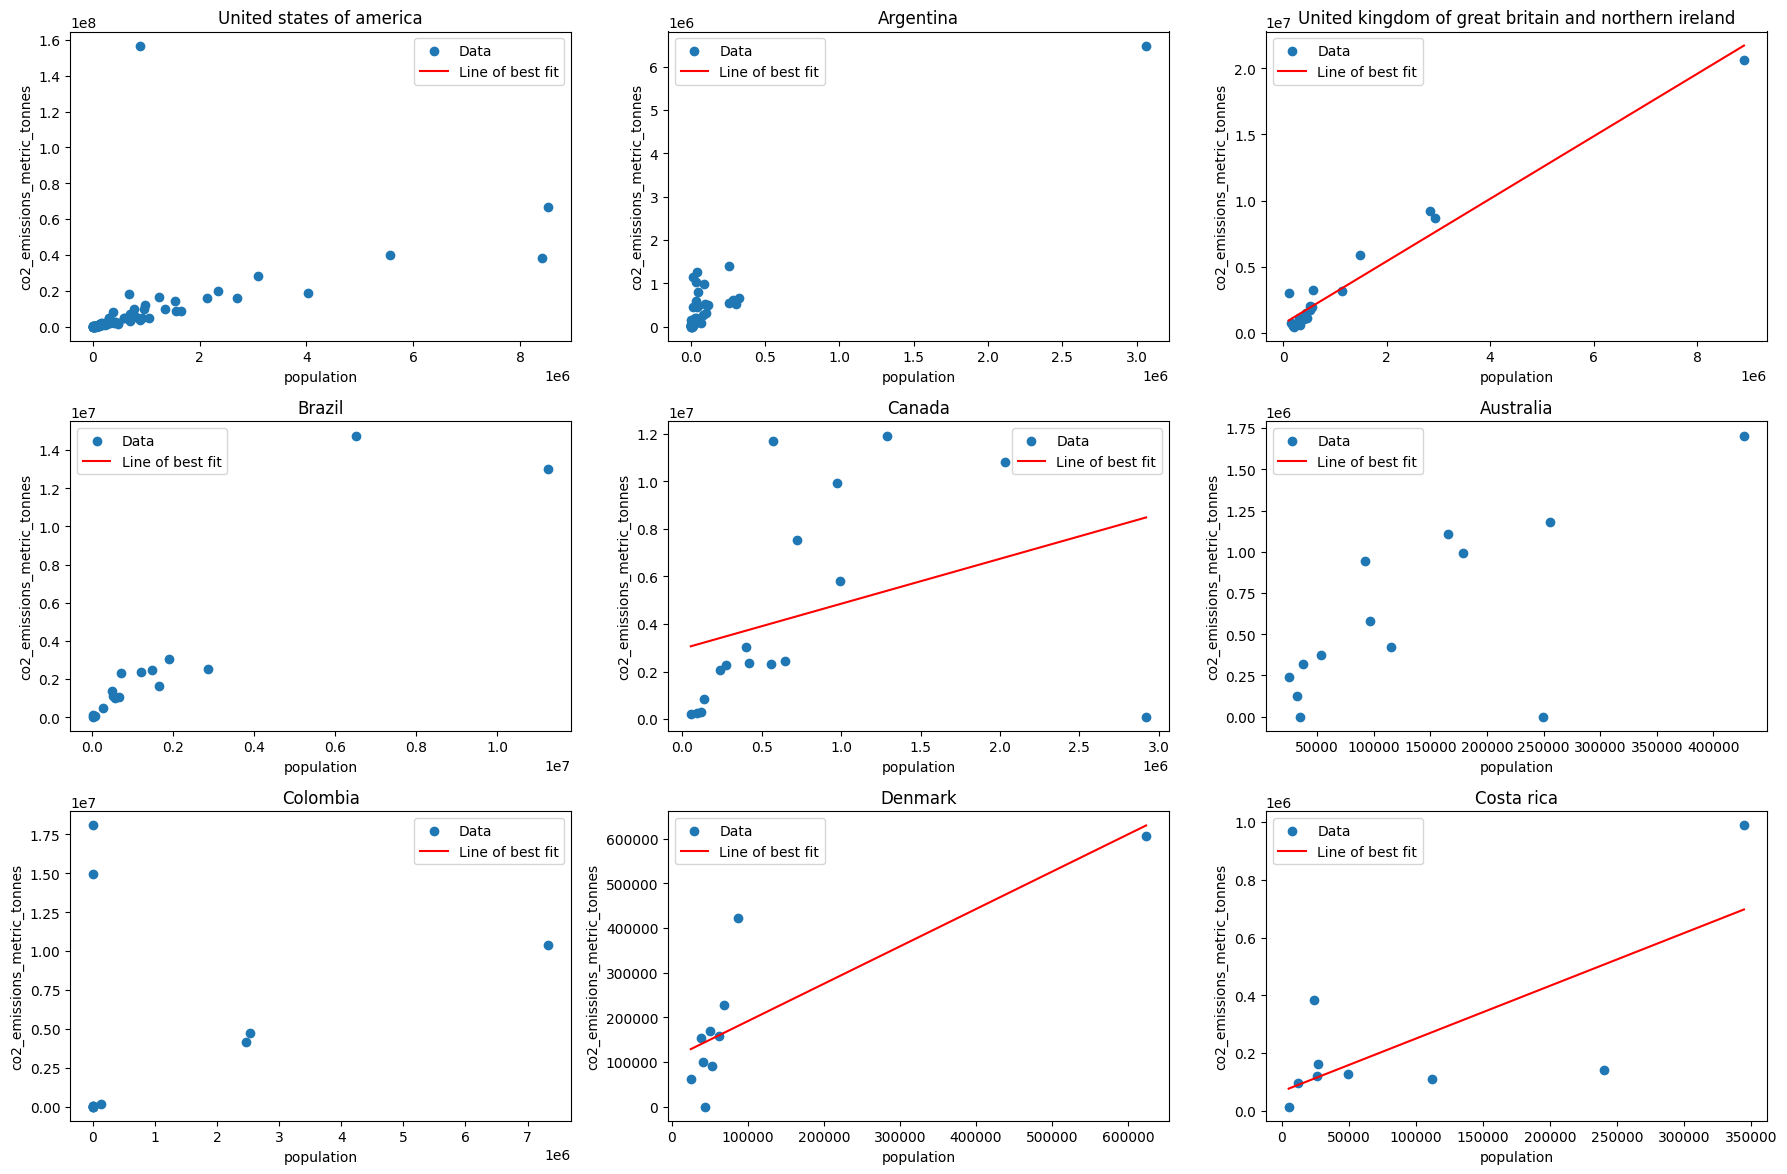

In [109]:
x_variable = 'population'
y_variable = 'co2_emissions_metric_tonnes'


# Create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12*1.5, 8*1.5))

# Flatten axes array for easier iteration
axes = axes.ravel()

# Loop through each subplot
for i, country_name in enumerate(my_list):

    # Filter dataset based on country_name and time
    subset = df_data[df_data['country_name'] == country_name]
    
    # Plot scatterplot on current axis
    axes[i].scatter(subset[x_variable], subset[y_variable], label="Data")
    
    # Fit and plot line of best fit
    a, b = np.polyfit(subset[x_variable], subset[y_variable], deg=1)
    x = np.array([subset[x_variable].min(), subset[x_variable].max()])
    y = a * x + b
    axes[i].plot(x, y, label="Line of best fit", color="red")
    
    # Add legend and title to current subplot
    axes[i].legend()
    axes[i].set_xlabel(x_variable)
    axes[i].set_ylabel(y_variable)
    axes[i].set_title(f"{country_name.capitalize()}")

# Adjust spacing between subplots
plt.tight_layout()

# Show plot
plt.show()




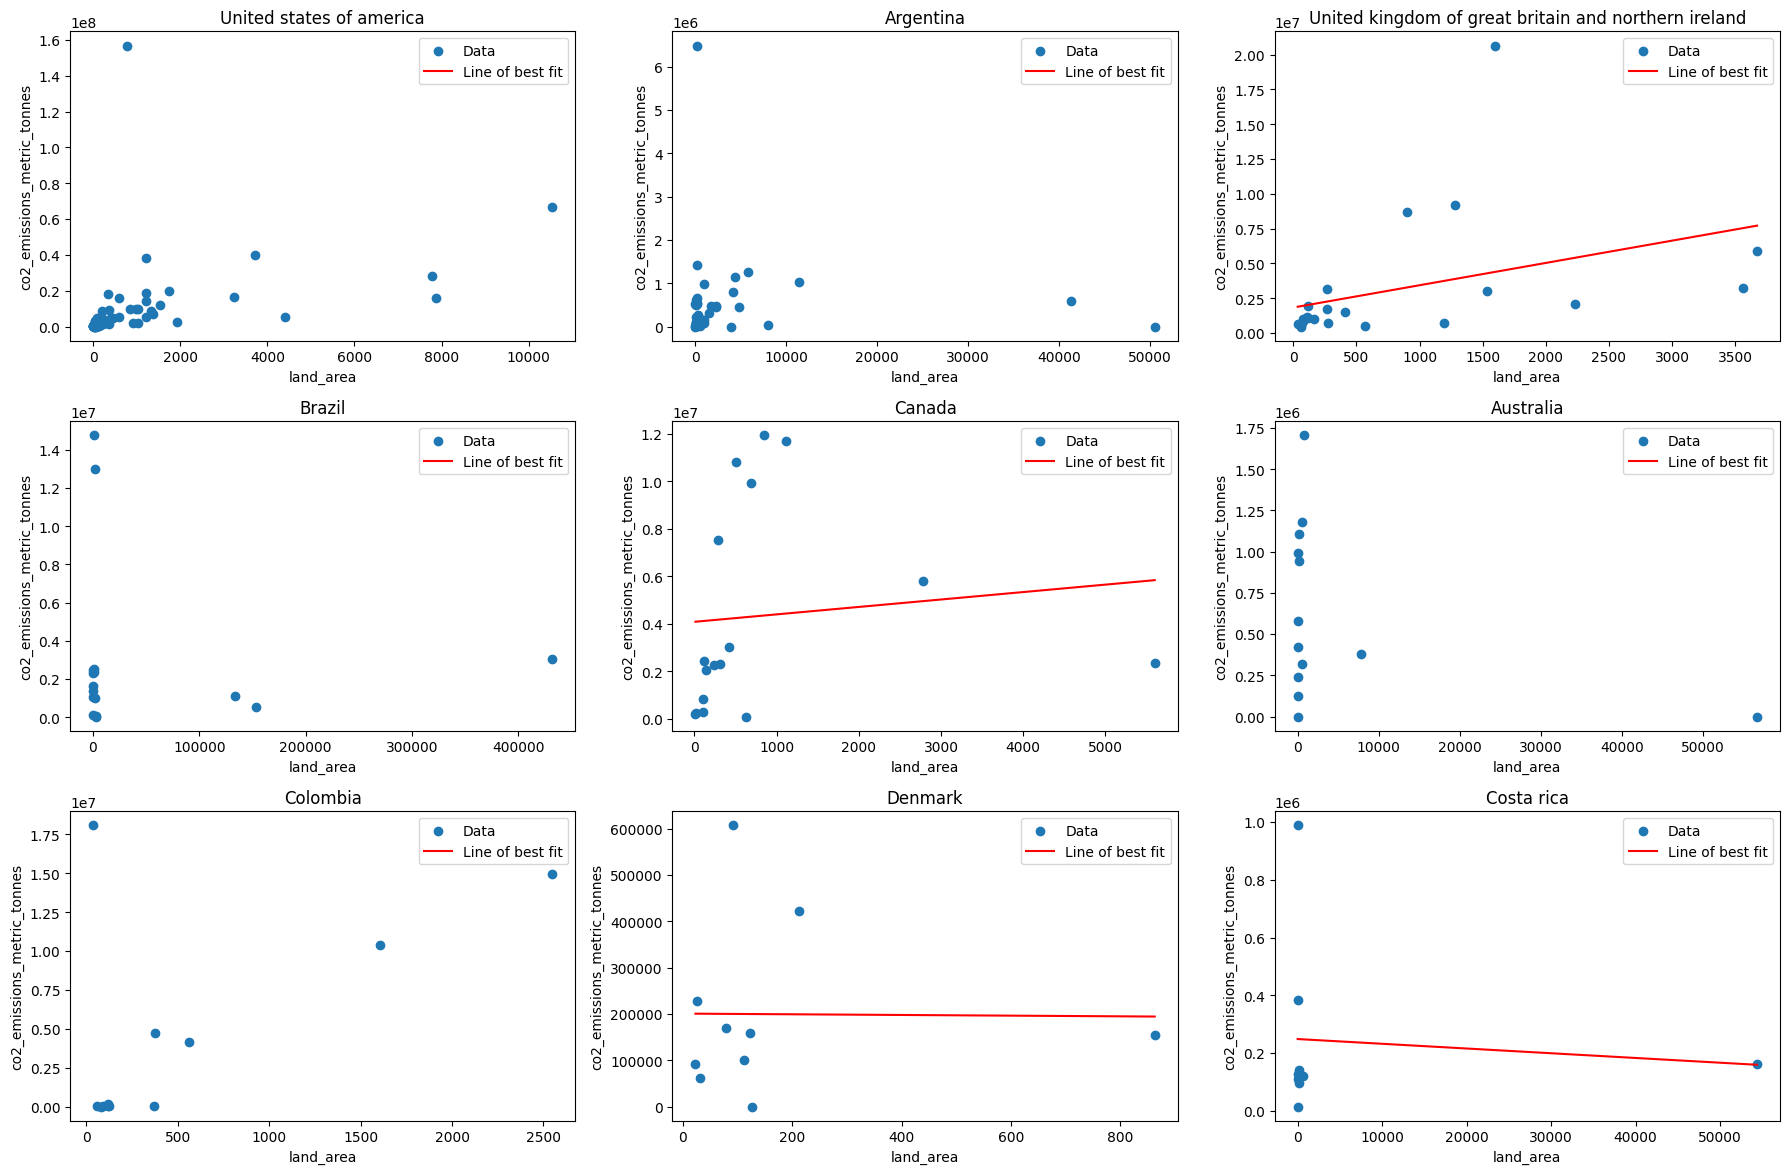

In [110]:

x_variable = 'land_area'
y_variable = 'co2_emissions_metric_tonnes'

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12*1.5, 8*1.5))

# Flatten axes array for easier iteration
axes = axes.ravel()

# Loop through each subplot

for i, country_name in enumerate(my_list):

    # Filter dataset based on country_name and time
    subset = df_data[df_data['country_name'] == country_name]
    
    # Plot scatterplot on current axis
    axes[i].scatter(subset[x_variable], subset[y_variable], label="Data")
    
    # Fit and plot line of best fit
    a, b = np.polyfit(subset[x_variable], subset[y_variable], deg=1)
    x = np.array([subset[x_variable].min(), subset[x_variable].max()])
    y = a * x + b
    axes[i].plot(x, y, label="Line of best fit", color="red")
    
    # Add legend and title to current subplot
    axes[i].legend()
    axes[i].set_xlabel(x_variable)
    axes[i].set_ylabel(y_variable)
    axes[i].set_title(f"{country_name.capitalize()}")

# Adjust spacing between subplots
plt.tight_layout()

# Show plot
plt.show()




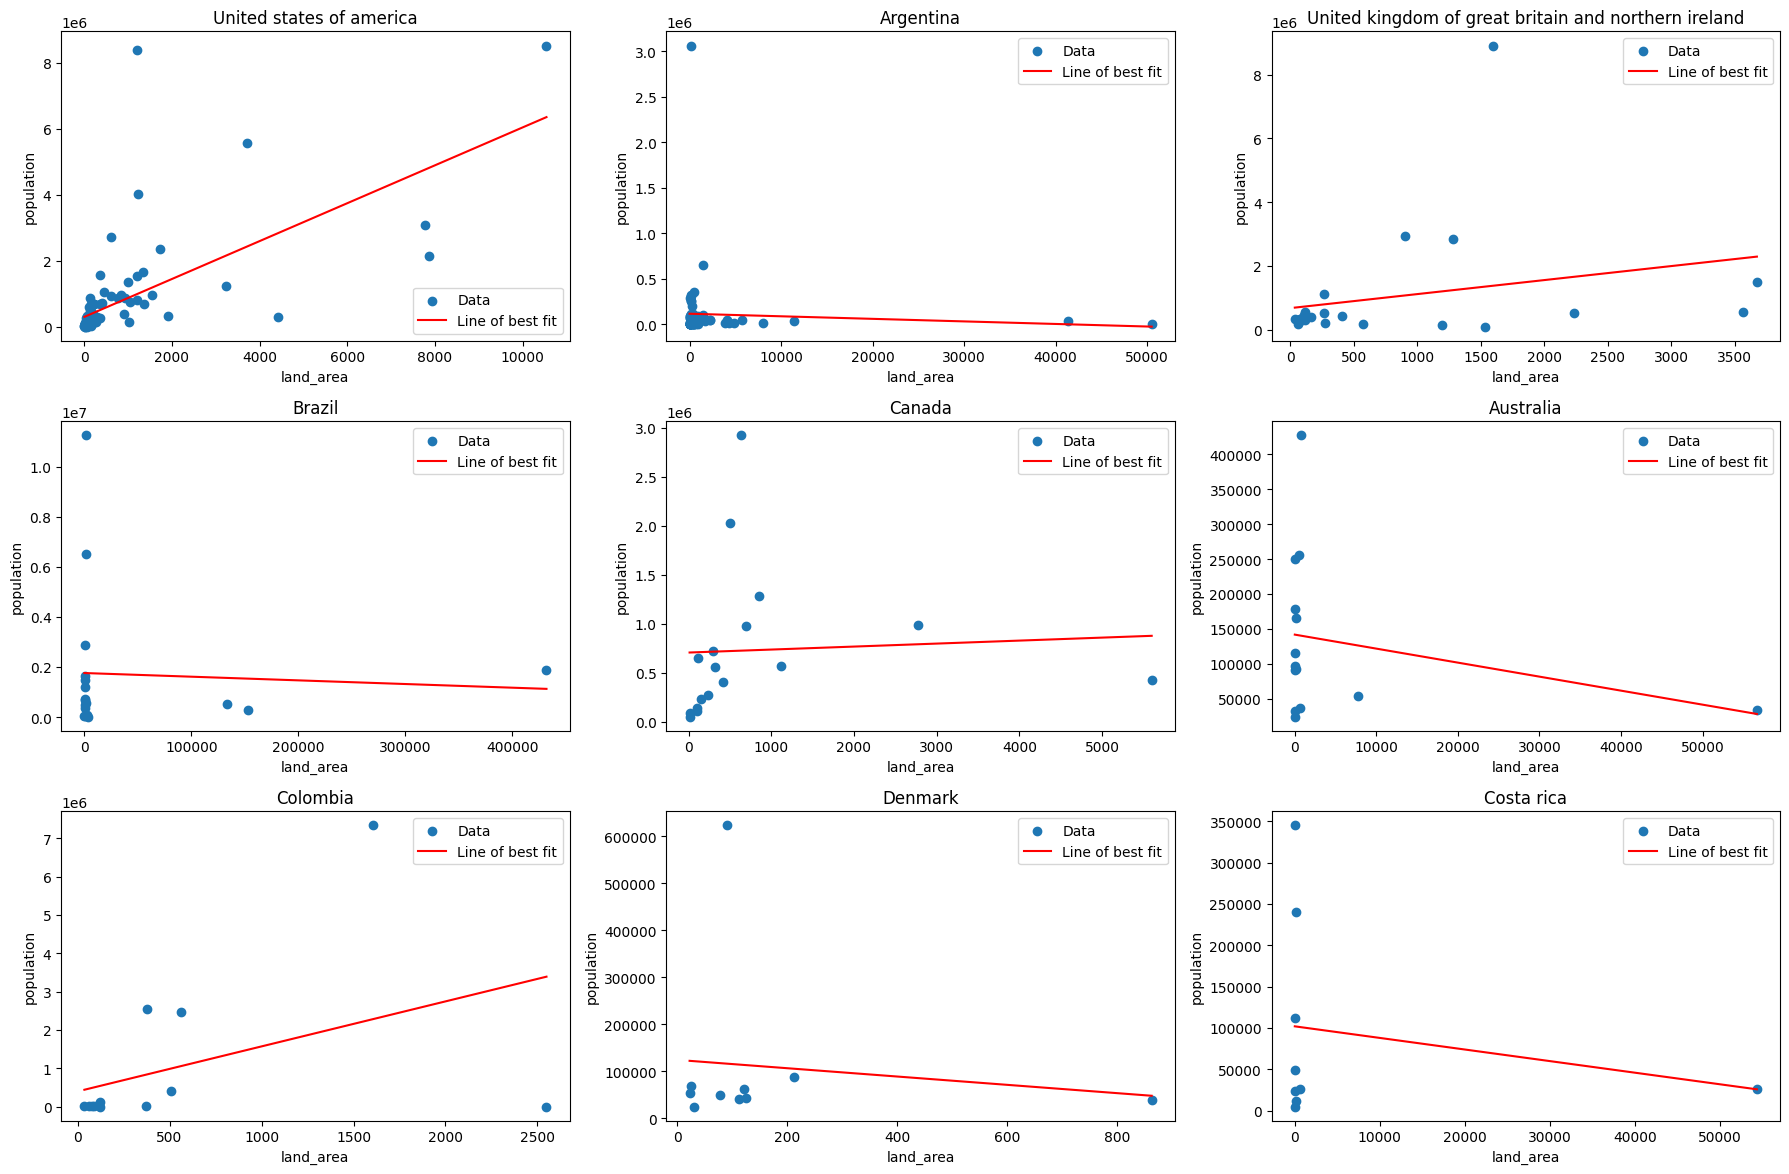

In [111]:

x_variable = 'land_area'
y_variable = 'population'

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12*1.5, 8*1.5))

# Flatten axes array for easier iteration
axes = axes.ravel()

# Loop through each subplot

for i, country_name in enumerate(my_list):

    # Filter dataset based on country_name and time
    subset = df_data[df_data['country_name'] == country_name]
    
    # Plot scatterplot on current axis
    axes[i].scatter(subset[x_variable], subset[y_variable], label="Data")
    
    # Fit and plot line of best fit
    a, b = np.polyfit(subset[x_variable], subset[y_variable], deg=1)
    x = np.array([subset[x_variable].min(), subset[x_variable].max()])
    y = a * x + b
    axes[i].plot(x, y, label="Line of best fit", color="red")
    
    # Add legend and title to current subplot
    axes[i].legend()
    axes[i].set_xlabel(x_variable)
    axes[i].set_ylabel(y_variable)
    axes[i].set_title(f"{country_name.capitalize()}")

# Adjust spacing between subplots
plt.tight_layout()

# Show plot
plt.show()





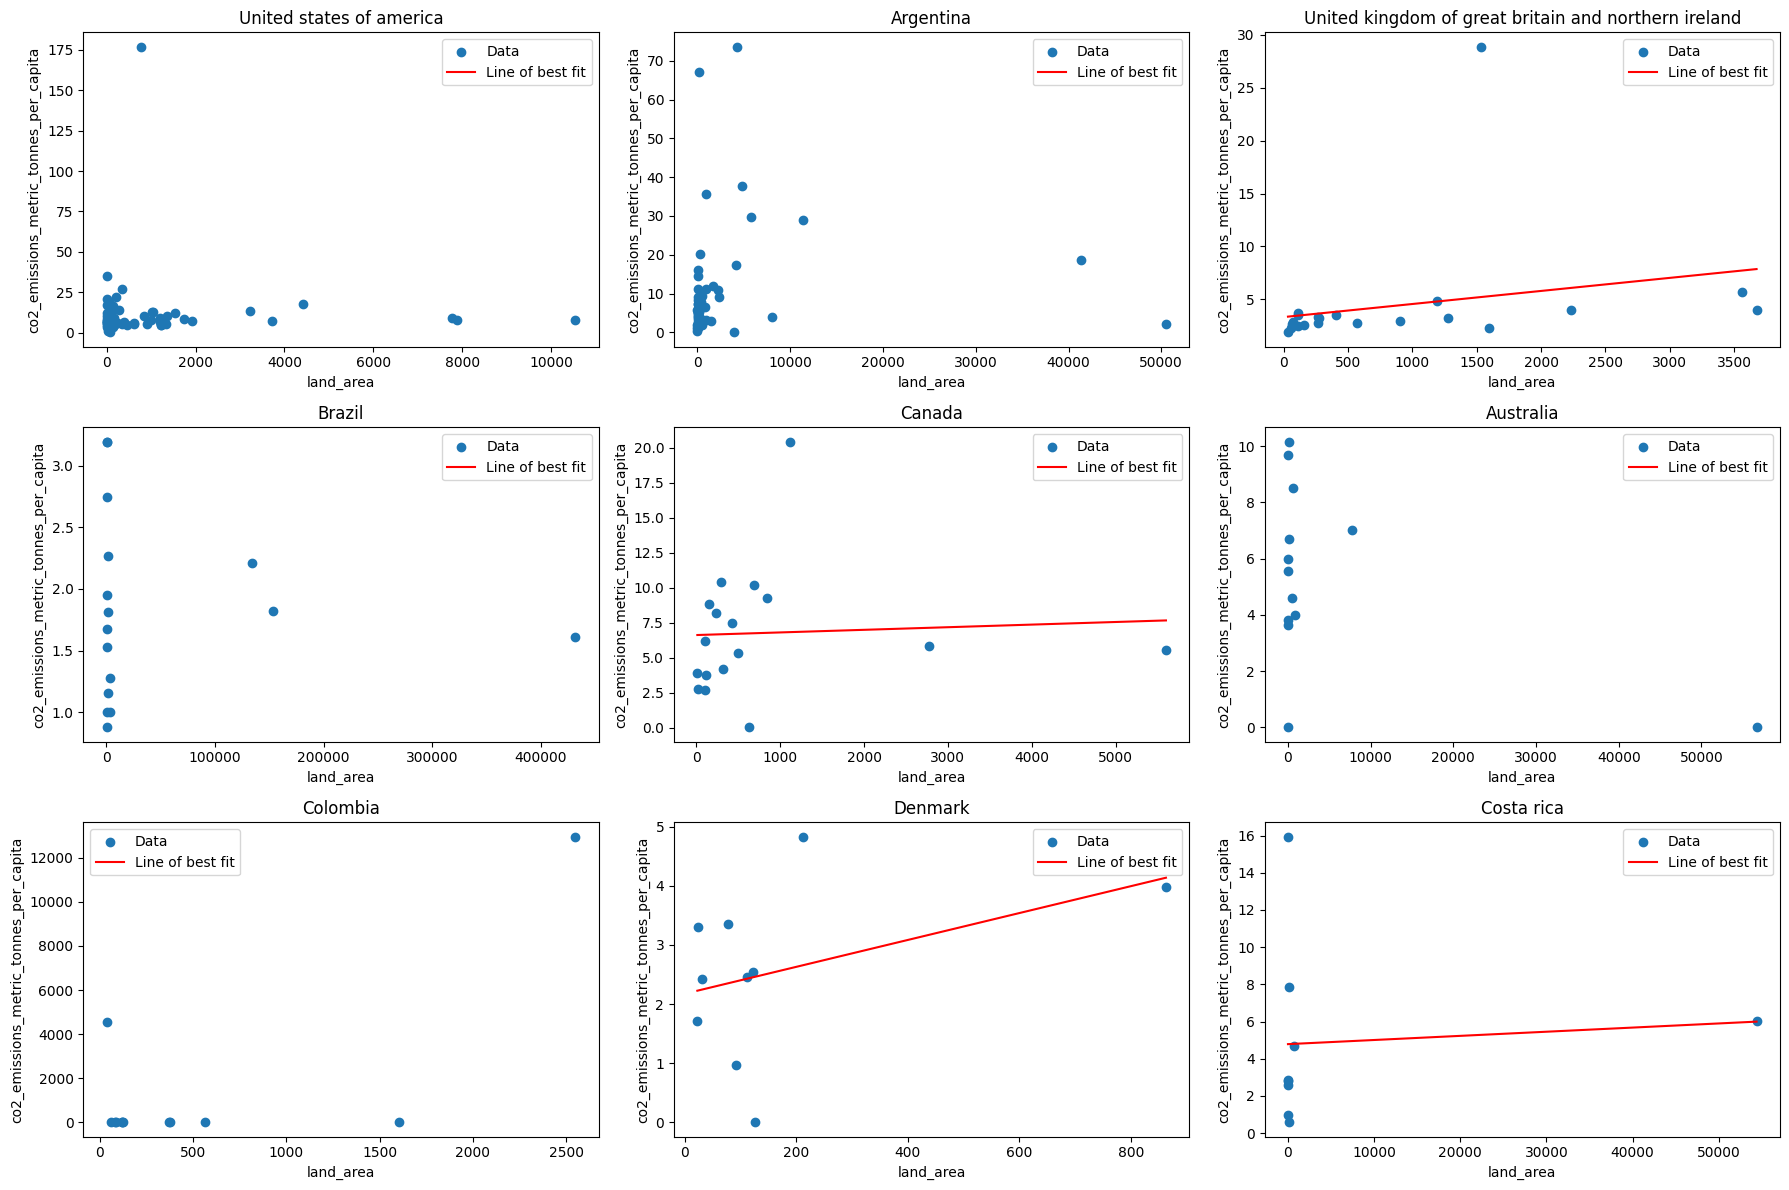

In [112]:
x_variable = 'land_area'
y_variable = 'co2_emissions_metric_tonnes_per_capita'

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12*1.5, 8*1.5))

# Flatten axes array for easier iteration
axes = axes.ravel()

# Loop through each subplot


for i, country_name in enumerate(my_list):

    # Filter dataset based on country_name and time
    subset = df_data[df_data['country_name'] == country_name]
    
    # Plot scatterplot on current axis
    axes[i].scatter(subset[x_variable], subset[y_variable], label="Data")
    
    # Fit and plot line of best fit
    a, b = np.polyfit(subset[x_variable], subset[y_variable], deg=1)
    x = np.array([subset[x_variable].min(), subset[x_variable].max()])
    y = a * x + b
    axes[i].plot(x, y, label="Line of best fit", color="red")
    
    # Add legend and title to current subplot
    axes[i].legend()
    axes[i].set_xlabel(x_variable)
    axes[i].set_ylabel(y_variable)
    axes[i].set_title(f"{country_name.capitalize()}")

# Adjust spacing between subplots
plt.tight_layout()

# Show plot
plt.show()





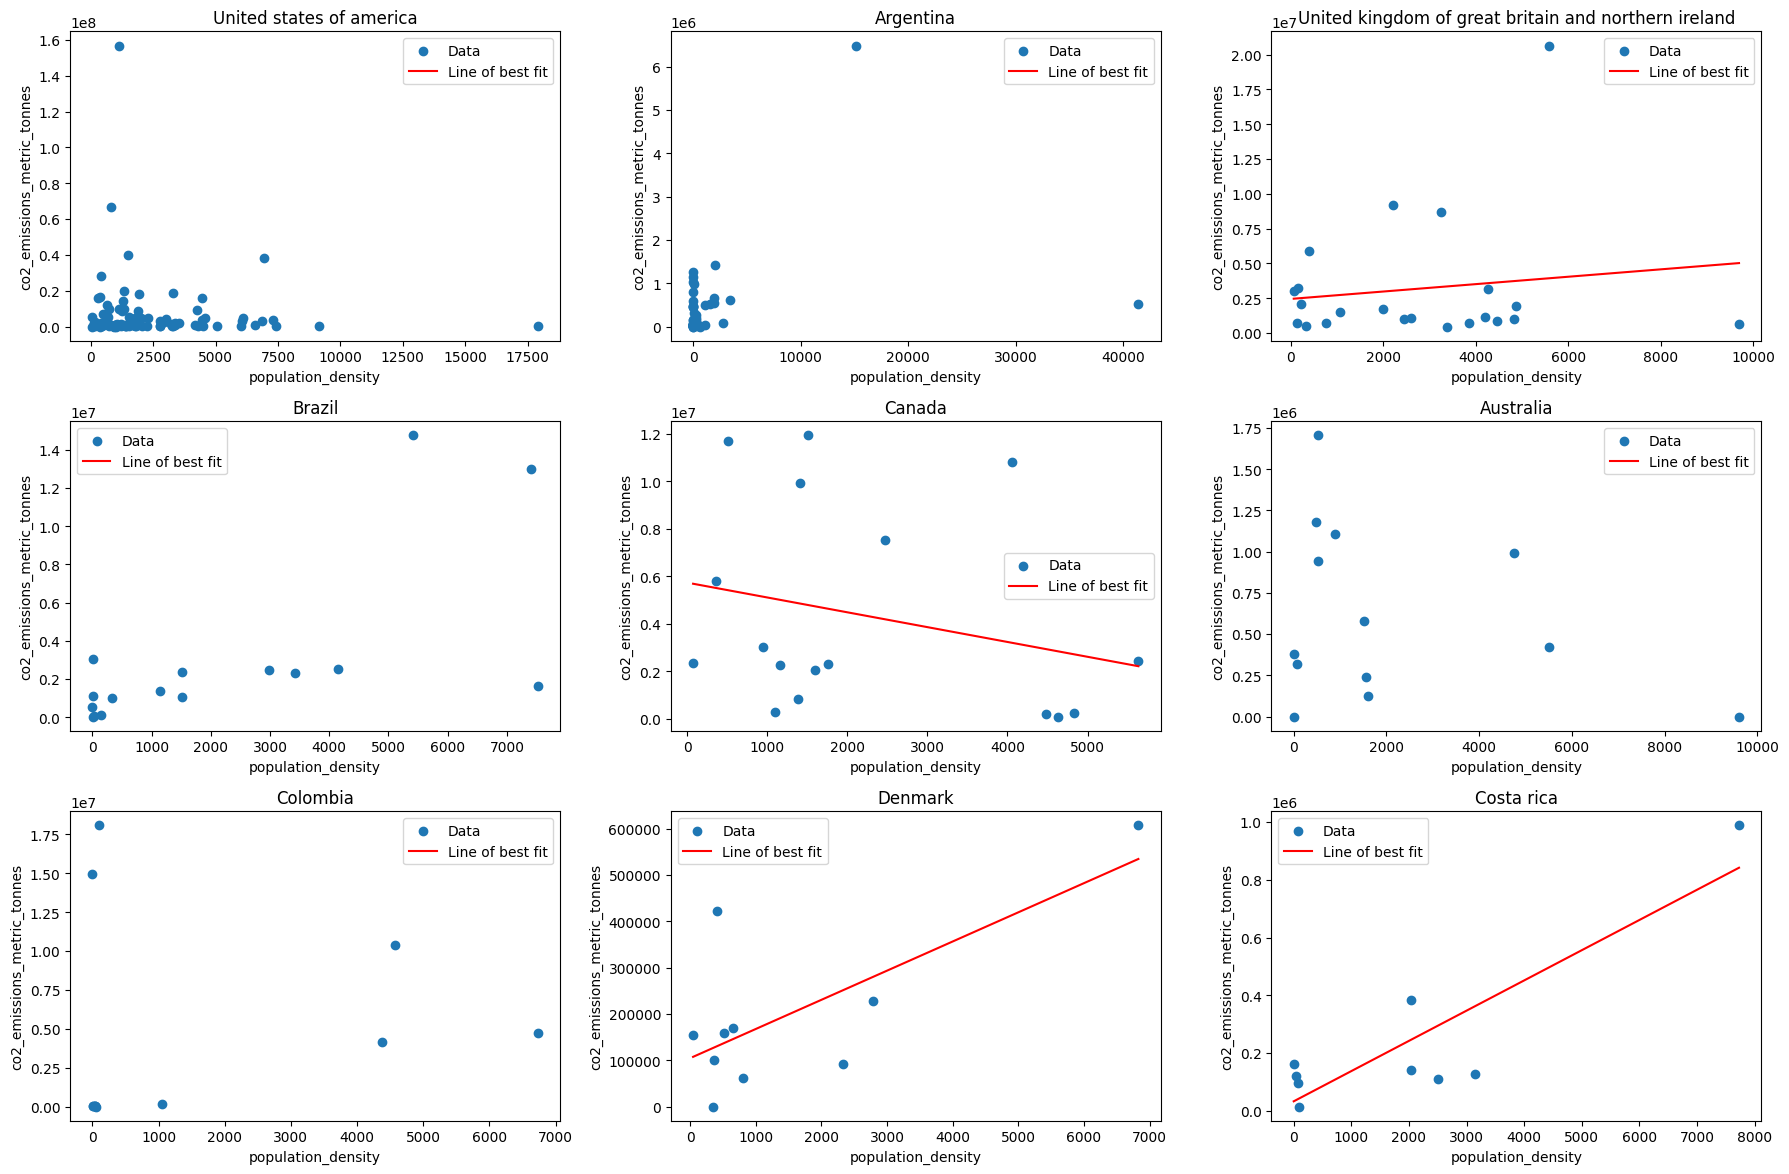

In [113]:
x_variable = 'population_density'
y_variable = 'co2_emissions_metric_tonnes'

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12*1.5, 8*1.5))

# Flatten axes array for easier iteration
axes = axes.ravel()

# Loop through each subplot

for i, country_name in enumerate(my_list):

    # Filter dataset based on country_name and time
    subset = df_data[df_data['country_name'] == country_name]
    
    # Plot scatterplot on current axis
    axes[i].scatter(subset[x_variable], subset[y_variable], label="Data")
    
    # Fit and plot line of best fit
    a, b = np.polyfit(subset[x_variable], subset[y_variable], deg=1)
    x = np.array([subset[x_variable].min(), subset[x_variable].max()])
    y = a * x + b
    axes[i].plot(x, y, label="Line of best fit", color="red")
    
    # Add legend and title to current subplot
    axes[i].legend()
    axes[i].set_xlabel(x_variable)
    axes[i].set_ylabel(y_variable)
    axes[i].set_title(f"{country_name.capitalize()}")

# Adjust spacing between subplots
plt.tight_layout()

# Show plot
plt.show()





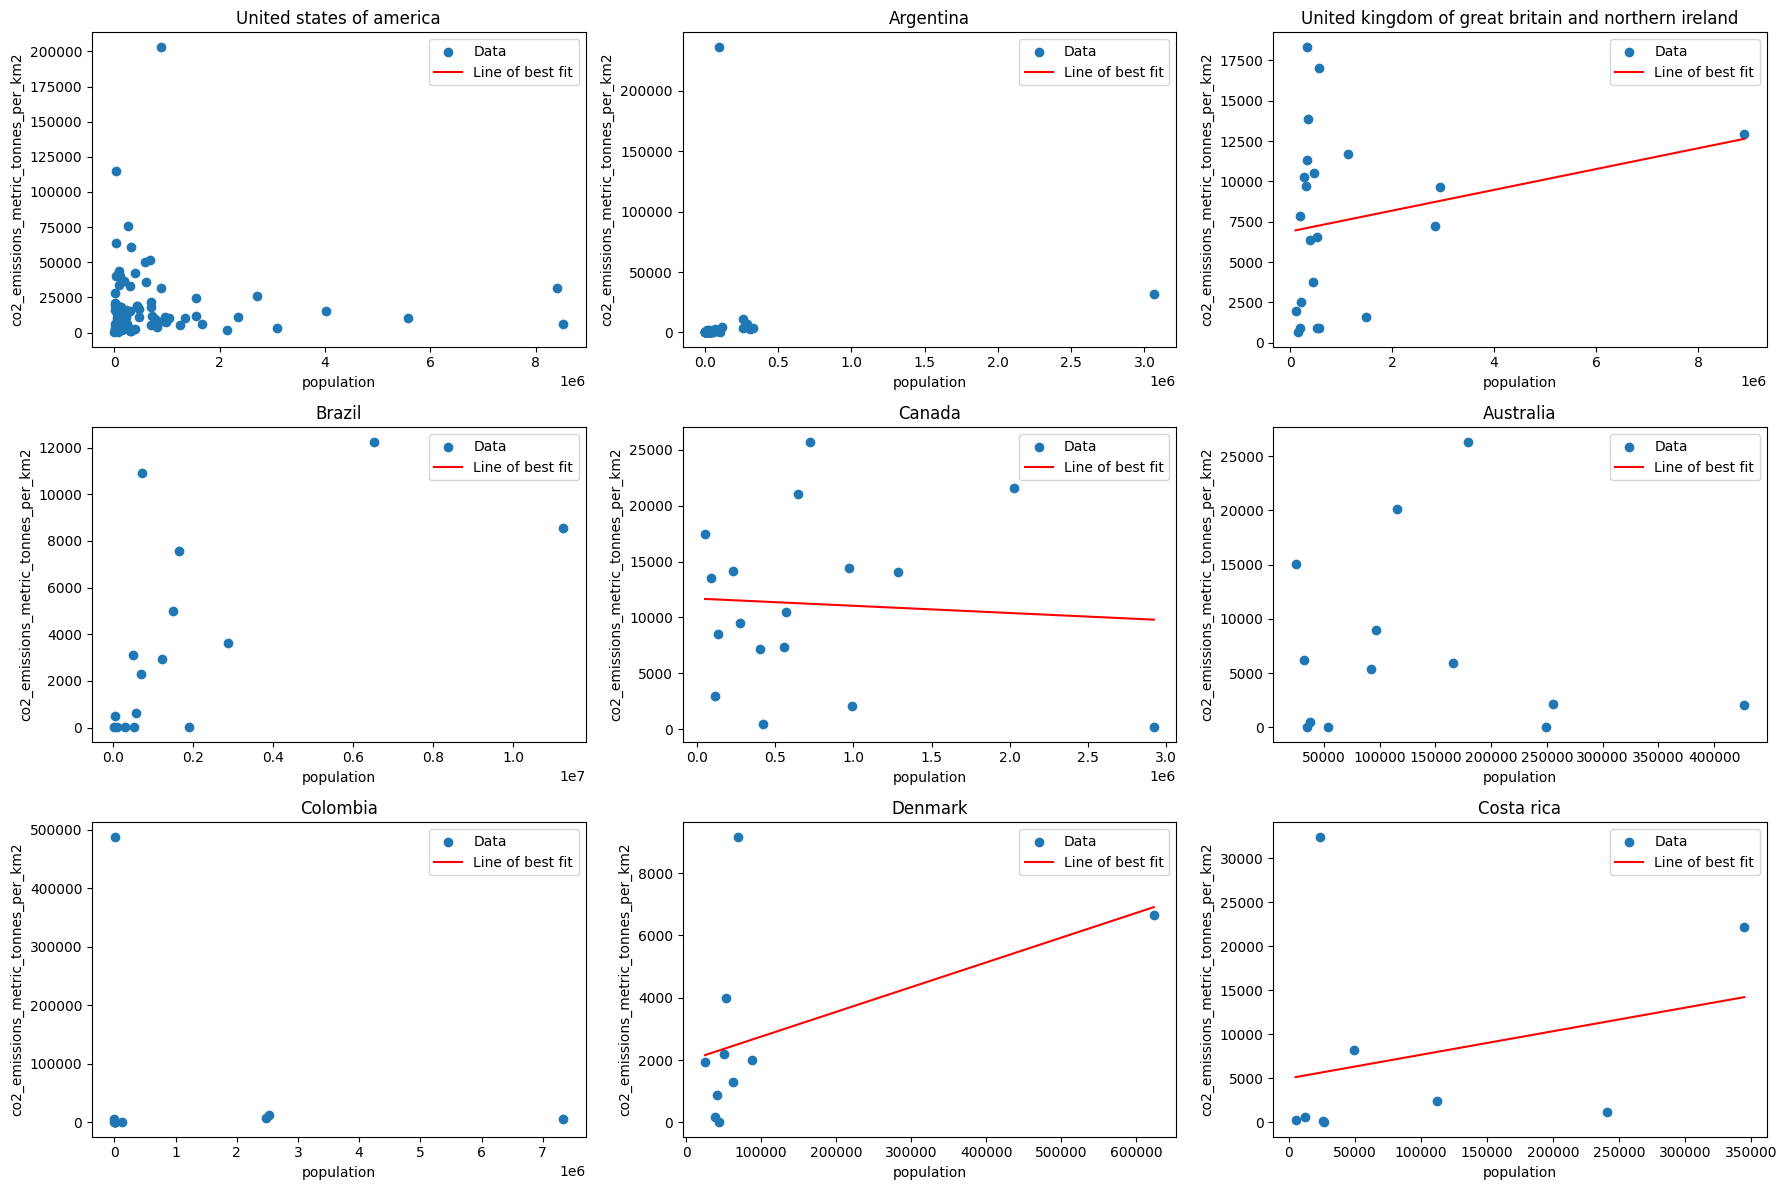

In [114]:

x_variable = 'population'
y_variable = 'co2_emissions_metric_tonnes_per_km2'

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12*1.5, 8*1.5))

# Flatten axes array for easier iteration
axes = axes.ravel()

# Loop through each subplot

for i, country_name in enumerate(my_list):

    # Filter dataset based on country_name and time
    subset = df_data[df_data['country_name'] == country_name]
    
    # Plot scatterplot on current axis
    axes[i].scatter(subset[x_variable], subset[y_variable], label="Data")
    
    # Fit and plot line of best fit
    a, b = np.polyfit(subset[x_variable], subset[y_variable], deg=1)
    x = np.array([subset[x_variable].min(), subset[x_variable].max()])
    y = a * x + b
    axes[i].plot(x, y, label="Line of best fit", color="red")
    
    # Add legend and title to current subplot
    axes[i].legend()
    axes[i].set_xlabel(x_variable)
    axes[i].set_ylabel(y_variable)
    axes[i].set_title(f"{country_name.capitalize()}")

# Adjust spacing between subplots
plt.tight_layout()

# Show plot
plt.show()





In [114]:
"""
Improvments
gps data:
python moduel geopy.geocoders

gdp data:
cities with similar gdp data would have similar co2 emission, as they would have 
similar industies.

data on which economic block does the contry belong to:
As more developed contries my have a more technology base indusrt

KNN called k-nearest neighbor regression (KNNR), instead of clustering the data points, 
the algorithm tries to estimate the output value of a new data point by finding 
the k nearest neighbors in the training set and averaging their output values. 
This can be useful for making predictions on new data points based on their 
similarity to the existing data points.

"""